# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [21]:
monthly_income = 12000

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()

# Check btc_data
# print(json.dumps(btc_data, indent = 3))

# Get current BTC price 
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

In [6]:
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()

# Check eth_data
# print(json.dumps(eth_data, indent = 3))

# Get current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
total_crypto_wallet = my_btc_value + my_eth_value

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")
print(f"The current value of your entire cryptocurrency wallet is ${total_crypto_wallet:0,.2f}")

The current value of your 1.2 BTC is $26,750.40
The current value of your 5.3 ETH is $7,967.07
The current value of your entire cryptocurrency wallet is $34,717.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [11]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-07-15", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz = "America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Run Alpaca to get last day's prices
ticker1_df = alpaca.get_bars(
    symbol=ticker,
    timeframe=timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Preview ticker1_df
# ticker1_df

# Separate ticker data
AGG_ticker = ticker1_df[ticker1_df["symbol"]=="AGG"].drop("symbol", axis=1)
SPY_ticker = ticker1_df[ticker1_df["symbol"]=="SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
ticker_df = pd.concat([AGG_ticker, SPY_ticker], axis = 1, keys = ["AGG", "SPY"])

# Preview ticker_df
# ticker_df

# Get current closing prices for SPY and AGG
agg_close_price = ticker_df["AGG"]["close"][0]
spy_close_price = ticker_df["SPY"]["close"][0]

In [12]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.25
Current SPY closing price: $385.13


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
total_stocks_bonds = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")
print(f"The current combined value of your stocks and bonds is ${total_stocks_bonds:0,.2f}")

The current value of your 50 SPY shares is $19,256.50
The current value of your 200 AGG shares is $20,450.00
The current combined value of your stocks and bonds is $39,706.50


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "stocks and bonds"])

# Display savings DataFrame
display(savings_df)

,amount
crypto,34717.466
stocks and bonds,39706.500


In [29]:
import matplotlib.pyplot as plt

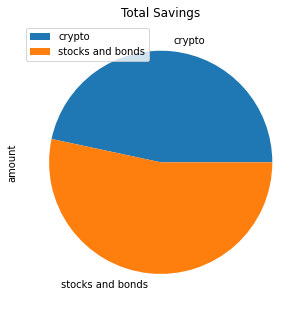

In [31]:
# Plot savings pie chart
savings_df.plot.pie(y = 0, title = "Total Savings", legend = "center", figsize=(5,10));
plt.legend(loc="upper left");

In [32]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(savings_data)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have more than 3 months of savings in your emergency fund.")
elif total_savings == emergency_fund:
    print("Keep going! You're almost there. You have exactly 3 months of savings in your emergency fund.")
else:
    print("Don't worry, you're ${emergency_fund - savings_fund} away from your goal.")

Congratulations! You have more than 3 months of savings in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [65]:
# Set start and end dates of three years back from today.
start_date = pd.Timestamp('2019-07-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-16', tz='America/New_York').isoformat()

In [66]:
# Get 3 years' worth of historical data for SPY and AGG
threeyrs_stocks_bonds1_df = alpaca.get_bars(
    symbol=ticker,
    timeframe=timeframe,
    start=start_date,
    end=end_date,
).df

# Preview fiveyrs_stocks_bonds1_df
# fiveyrs_stocks_bonds1_df

# Separate ticker data
AGG_threeyrs_ticker = threeyrs_stocks_bonds1_df[threeyrs_stocks_bonds1_df["symbol"]=="AGG"].drop("symbol", axis = 1)
SPY_threeyrs_ticker = threeyrs_stocks_bonds1_df[threeyrs_stocks_bonds1_df["symbol"]=="SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
threeyrs_stocks_bonds_df = pd.concat([AGG_threeyrs_ticker, SPY_threeyrs_ticker], axis = 1, keys = ["AGG", "SPY"])

# Display sample data
threeyrs_stocks_bonds_df.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   
2019-07-22 04:00:00+00:00  111.41  111.410  111.30  111.31  2855073   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-07-16 04:00:00+00:00       12676  110.743438  300.64  300.88  299.44   
2019-07-17 04:00:00+00:00       11771  111.066605  299.77  299.93  297.74   
2019-07-18 04:00:00+00:00       17331  111.220550  297.18  299.25  296.70   
2019-07-19 04:00:00+00:00        9948  111.225017  300.01  300.07  296.96   
2019-07-22 04:00:00+00:00        7937  111.344721  297.61  298.50  297.04   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-07-16 04:00:00+00:00  299.71  40807546      183816  300.108039  
2019-07-17 04:00:00+00:00  297.74  44343835      200151  298.543544  
2019-07-18 04:00:00+00:00  298.83  53567032      236661  298.067797  
2019-07-19 04:00:00+00:00  297.17  76794138      260715  298.617649  
2019-07-22 04:00:00+00:00  297.90  45137404      186383  297.748117

In [69]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty = MCSimulation(portfolio_data = threeyrs_stocks_bonds_df, 
                  weights = [.40,.60], 
                  num_simulation = 500, 
                  num_trading_days = 252*30)

In [70]:
# Print the simulation input data
MC_thirty.portfolio_data

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-07-16 04:00:00+00:00  110.75  110.830  110.6400  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.9100  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.0600  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.1400  111.17  3150774   
2019-07-22 04:00:00+00:00  111.41  111.410  111.3000  111.31  2855073   
...                           ...      ...       ...     ...      ...   
2022-07-11 04:00:00+00:00  101.67  101.920  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.190  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.240  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.980  101.3300  101.85  6224496   
2022-07-15 04:00:00+00:00  101.94  102.350  101.9000  102.25  8440151   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-16 04:00:00+00:00       12676  110.743438          NaN  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   
2019-07-22 04:00:00+00:00        7937  111.344721     0.001259  297.61   
...                               ...         ...          ...     ...   
2022-07-11 04:00:00+00:00       17084  101.720884     0.004643  385.91   
2022-07-12 04:00:00+00:00       21057  102.039440     0.001377  383.66   
2022-07-13 04:00:00+00:00       26716  101.977478     0.003633  375.09   
2022-07-14 04:00:00+00:00       24722  101.747120    -0.003522  373.99   
2022-07-15 04:00:00+00:00       27300  102.214854     0.003927  382.62   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-07-16 04:00:00+00:00  300.8800  299.440  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.9300  297.740  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.2500  296.700  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.0700  296.960  297.17  76794138      260715   
2019-07-22 04:00:00+00:00  298.5000  297.040  297.90  45137404      186383   
...                             ...      ...     ...       ...         ...   
2022-07-11 04:00:00+00:00  386.8700  383.500  384.23  58100363      473423   
2022-07-12 04:00:00+00:00  386.1600  378.990  380.83  62027220      512244   
2022-07-13 04:00:00+00:00  381.9200  374.658  378.83  83575452      671953   
2022-07-14 04:00:00+00:00  379.0498  371.040  377.91  89349688      637416   
2022-07-15 04:00:00+00:00  385.2500  380.540  385.13  79318992      488124   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-16 04:00:00+00:00  300.108039          NaN  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555  
2019-07-22 04:00:00+00:00  297.748117     0.002457  
...                               ...          ...  
2022-07-11 04:00:00+00:00  384.871994    -0.011424  
2022-07-12 04:00:00+00:00  382.617620    -0.008849  
2022-07-13 04:00:00+00:00  378.819688    -0.005252  
2022-07-14 04:00:00+00:00  375.589384    -0.002429  
2022-07-15 04:00:00+00:00  383.334989     0.019105  

[757 rows x 16 columns]

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999160,1.008508,1.015918,0.978185,0.990661,0.994419,1.008303,1.003355,1.001499,0.998514,...,1.010722,0.987830,1.003107,0.992019,1.000506,0.998119,0.998954,0.996499,1.004754,0.990145
2,1.000202,1.003005,1.009375,0.976439,0.996606,0.987063,1.003925,1.020303,0.991860,0.996486,...,1.025075,0.990322,1.003421,0.983097,1.000586,0.993877,0.989613,0.985740,0.999627,0.975352
3,1.011450,1.013060,1.008490,0.977730,0.979984,1.003513,0.982088,1.029595,0.988818,0.985089,...,1.002117,0.998221,1.011561,0.987577,0.995529,1.000954,0.990389,0.994929,0.993249,0.985181
4,1.014484,1.015523,1.001667,0.978180,0.971249,0.998539,0.992610,1.024796,0.994097,0.991836,...,0.975823,0.994368,1.014641,0.979545,0.994647,1.010096,0.995746,0.996610,0.991851,0.979077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.965740,10.491933,0.783884,2.090370,3.526166,2.348462,1.817984,16.837296,0.951438,5.644021,...,7.649516,3.983728,8.012137,2.968196,14.696709,1.032075,8.990870,2.047787,2.183137,3.935143
7557,1.950571,10.481523,0.777629,2.097597,3.527146,2.327884,1.825077,16.878115,0.967550,5.577271,...,7.732400,3.941035,8.179242,2.981321,14.913383,1.032122,8.845160,2.066892,2.196435,3.962637
7558,1.931586,10.533696,0.775675,2.111816,3.552682,2.300250,1.805339,17.109817,0.968795,5.576660,...,7.743497,3.935664,8.254453,2.964539,14.800034,1.022939,8.845038,2.066262,2.180913,3.964461
7559,1.907543,10.503889,0.780270,2.120233,3.558851,2.313297,1.819441,17.018604,0.965720,5.542899,...,7.685578,3.944641,8.361675,2.990503,14.751300,1.036189,8.870735,2.078307,2.176277,4.010790


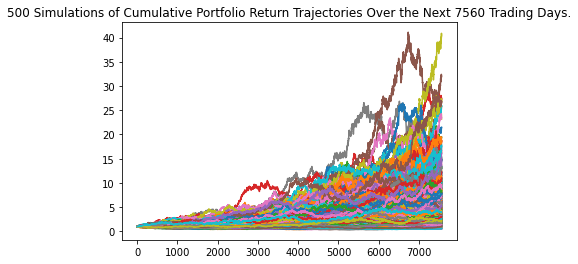

In [73]:
# Plot simulation outcomes
MC_thirty.plot_simulation();

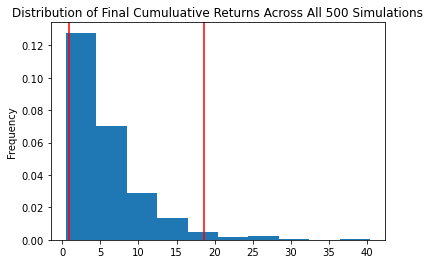

In [74]:
# Plot probability distribution and confidence intervals
MC_thirty.plot_distribution();

### Retirement Analysis

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_thirty.summarize_cumulative_return()

In [76]:
# Print summary statistics from the Monte Carlo simulation results
MC_summary

count           500.000000
mean              5.953515
std               5.025175
min               0.482323
25%               2.599586
50%               4.382445
75%               7.695577
max              40.384540
95% CI Lower      0.933379
95% CI Upper     18.640999
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [77]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_summary[8] * initial_investment
ci_upper = MC_summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $18,667.58 and $372,819.99.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [78]:
# Set initial investment
initial_investment_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_summary[8] * initial_investment_increase
ci_upper = MC_summary[9] * initial_investment_increase

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $28,001.37 and $559,229.98.


## Optional Challenge - Early Retirement


### Ten Years Retirement Option

In [79]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(portfolio_data = threeyrs_stocks_bonds_df, 
                  weights = [.20,.80], 
                  num_simulation = 500, 
                  num_trading_days = 252*10)

In [80]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017892,1.004079,1.019812,0.993523,0.997505,1.015252,0.992064,1.008876,0.967324,1.005139,...,0.997270,1.013067,1.019433,1.018012,0.986033,0.995066,0.994886,0.999699,0.988327,0.993323
2,1.015075,0.997315,1.053032,0.988420,0.995924,1.004365,1.025262,1.029826,0.964037,0.998243,...,0.995622,0.997546,1.034603,1.018306,0.986787,0.988416,1.007366,0.998517,0.999240,0.989604
3,1.010943,0.993655,1.031354,0.994429,1.003228,0.977731,1.030686,1.029176,0.951845,0.986995,...,0.989072,0.994345,1.037302,1.001410,1.000154,0.998410,0.991578,0.980494,0.979190,1.005893
4,1.003971,0.982787,1.014758,1.002476,1.004201,0.954772,1.029413,1.038430,0.931307,0.977526,...,0.987314,0.983130,1.031931,1.006662,0.983618,0.982119,0.978228,0.993641,1.003351,1.004765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.183843,0.694016,6.901631,1.510662,5.048884,3.822028,4.187872,1.195454,1.648020,1.627450,...,2.014106,0.608188,4.237011,3.934934,2.304907,2.706701,4.163003,4.309019,1.339084,2.244033
2517,2.189771,0.708510,6.936410,1.524825,5.034275,3.783896,4.189047,1.215901,1.661593,1.634624,...,2.051516,0.606835,4.197459,3.885618,2.306232,2.703956,4.168640,4.462422,1.332321,2.229061
2518,2.162017,0.709418,6.910692,1.525976,5.000978,3.769846,4.232583,1.227820,1.656446,1.630697,...,2.024129,0.616575,4.214035,3.918966,2.315595,2.722130,4.110552,4.553371,1.342952,2.229647
2519,2.110607,0.708574,6.725689,1.496902,5.094720,3.792300,4.355879,1.210364,1.645255,1.620971,...,2.046458,0.625567,4.165145,3.984924,2.290822,2.826552,4.144697,4.576026,1.357599,2.234750


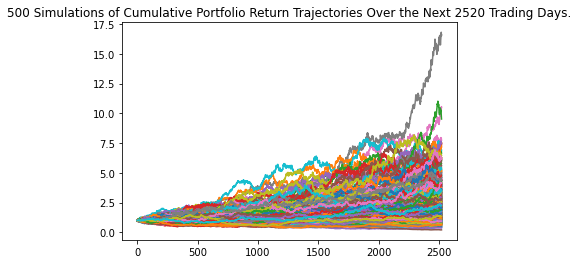

In [81]:
# Plot simulation outcomes
MC_ten.plot_simulation();

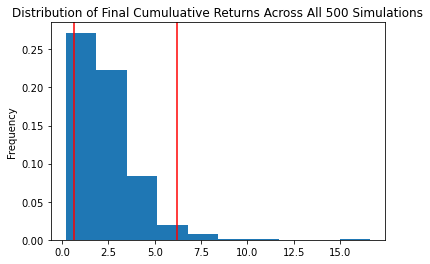

In [82]:
# Plot probability distribution and confidence intervals
MC_ten.plot_distribution();

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_summary = MC_ten.summarize_cumulative_return()

# Print summary statistics
MC_ten_summary

count           500.000000
mean              2.381538
std               1.569591
min               0.208679
25%               1.354384
50%               1.994281
75%               2.992861
max              16.613363
95% CI Lower      0.663283
95% CI Upper      6.226300
Name: 2520, dtype: float64

In [90]:
# Set initial investment
initial_investment_ten = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = MC_ten_summary[8] * initial_investment_ten
ci_upper_ten = MC_ten_summary[9] * initial_investment_ten

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $50,000.00 in the portfolio over the next 10 years will end within in the range of $33,164.13 and $311,314.99


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")